<a href="https://colab.research.google.com/github/AngelVazquezSuarez/AngelVazquez_2809/blob/main/Proyecto_de_Bosques_Aleatorios_DLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import io

In [7]:
# Importamos nuestros datos
from google.colab import files

features = files.upload()
respuesta = files.upload()

TypeError: ignored

In [8]:
# Nombramos a las columnas con indices de ambos archivos
features_names=['1','2','3','4','5','6','7','8','9']

# Declaramos nuestros Primer Dataframe para trabajar
df1 = pd.read_csv(io.BytesIO(features['features.csv']), header=None, names=features_names)
df1

,1,2,3,4,5,6,7,8,9
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [9]:
# Reptimos el procesos y declaramos nuuestro segundo Dataframe
respuesta_names=['10']
df2 = pd.read_csv(io.BytesIO(respuesta['respuesta.csv']), header=None, names=respuesta_names)
df2

,10
0,2
1,2
2,2
3,2
4,2
...,...
694,2
695,2
696,4
697,4


In [10]:
# Haciendo uso de la funcion "concat" concademos los datos en un solo Dataframe 
df = pd.concat([df1, df2], axis=1)
df

,1,2,3,4,5,6,7,8,9,10
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [11]:
#Describimos nuestro Dataframe
df.describe()

,1,2,3,4,5,7,8,9,10
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [12]:
# Describimos el tipo de datos que estamos manejando
df.dtypes

1      int64
2      int64
3      int64
4      int64
5      int64
6     object
7      int64
8      int64
9      int64
10     int64
dtype: object

In [13]:
#Reemplazamos el caracter '?' por un 0 en la fila X6 para poder procesarlos
df['6'] = df['6'].replace('?', 0)
df

,1,2,3,4,5,6,7,8,9,10
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [14]:
#Convertimos la columna X6 de Strings a Int para su procesamiento y verificamos
df["6"] = df["6"].astype(str).astype(int) 
df.dtypes

1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
dtype: object

In [15]:
#Primer Nivel de Aleatoriedad:Se usa el Muestro de Reemplazo
print(df.sample(frac=4/5, replace=True))

      1  2   3  4  5  6  7   8  9  10
469   1  1   2  1  2  1  2   1  1   2
605  10  5  10  3  5  8  7   8  3   4
578   1  1   1  1  2  1  2   1  1   2
288   6  1   3  1  4  5  5  10  1   4
614   2  1   1  1  1  1  2   1  1   2
..   .. ..  .. .. .. .. ..  .. ..  ..
2     3  1   1  1  2  2  3   1  1   2
375   1  1   1  1  2  1  1   1  1   2
79    2  1   1  1  3  1  2   1  1   2
445   2  1   1  1  2  1  1   1  1   2
172   1  1   1  1  2  1  2   1  1   2

[559 rows x 10 columns]


In [16]:
# Segundo Nivel de Aleatoriedad: El modelo toma tres parametros paraa evaluar diferentes cada vez
from random import sample
print(df.columns[:-1], "\n")
print(sample(set(df.columns[:-1]), 3))

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object') 

['2', '7', '4']


 METRICAS DEL BOSQUE ALEATORIO
Caso:  0
La Varianza es igual a:  1.0
El OOB Score es:  0.9656652360515021
La Precision del Modelo es igual a: 1.0
La Sensibilidad del Modelo es igual a: 1.0
El Puntaje del Modelo es igual a: 1.0




Caso:  1
La Varianza es igual a:  1.0
El OOB Score es:  0.9613733905579399
La Precision del Modelo es igual a: 1.0
La Sensibilidad del Modelo es igual a: 1.0
El Puntaje del Modelo es igual a: 1.0




Caso:  2
La Varianza es igual a:  0.9971387696709585
El OOB Score es:  0.9628040057224606
La Precision del Modelo es igual a: 0.996833608146551
La Sensibilidad del Modelo es igual a: 0.996833608146551
El Puntaje del Modelo es igual a: 0.996833608146551




Caso:  3
La Varianza es igual a:  0.9985693848354793
El OOB Score es:  0.9656652360515021
La Precision del Modelo es igual a: 0.9989106753812635
La Sensibilidad del Modelo es igual a: 0.9979253112033195
El Puntaje del Modelo es igual a: 0.9984152426900519




Caso:  4
La Varianza es igual a:  1.0
El OOB Score e

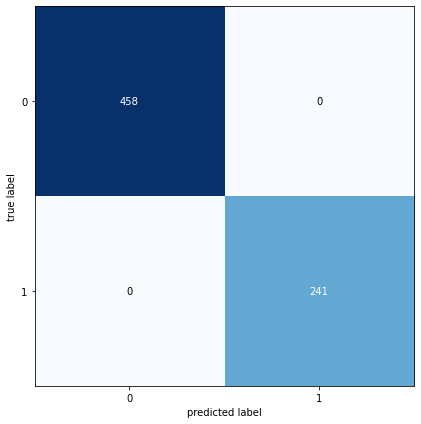

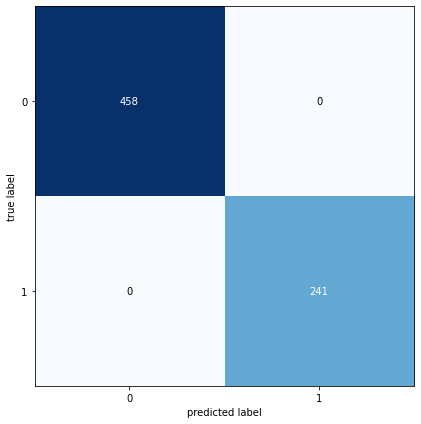

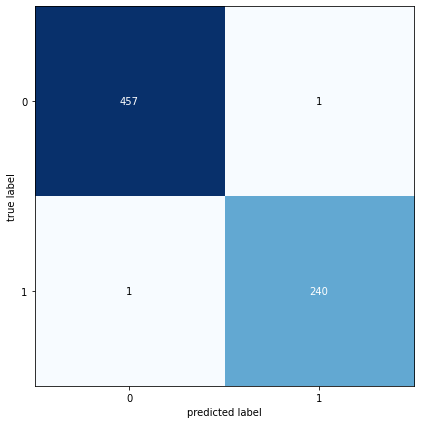

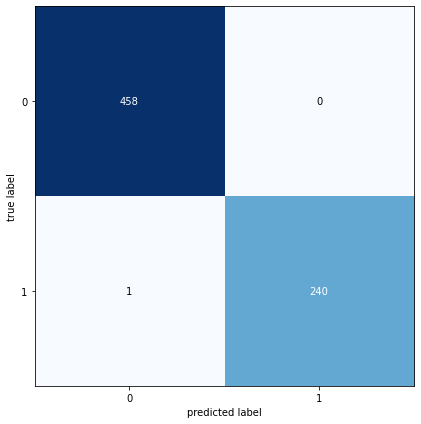

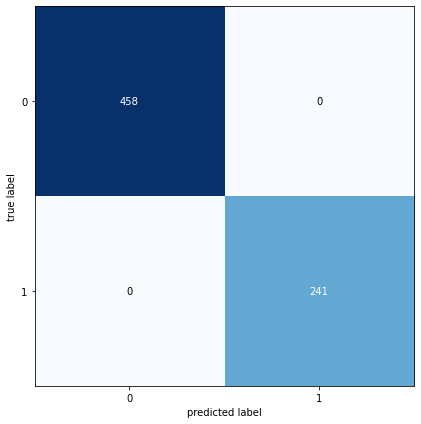

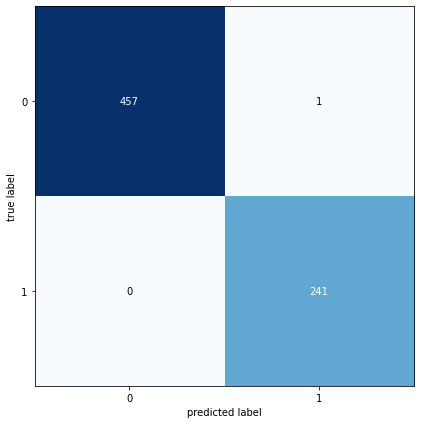

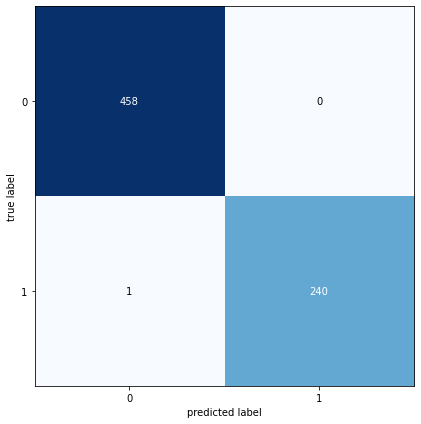

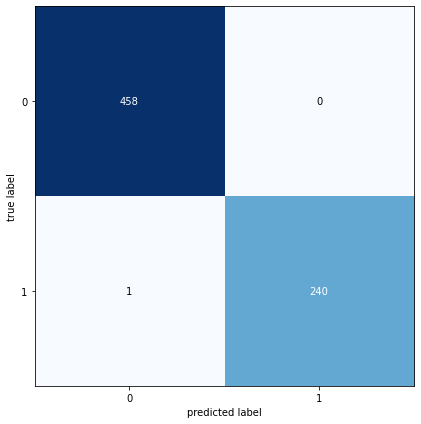

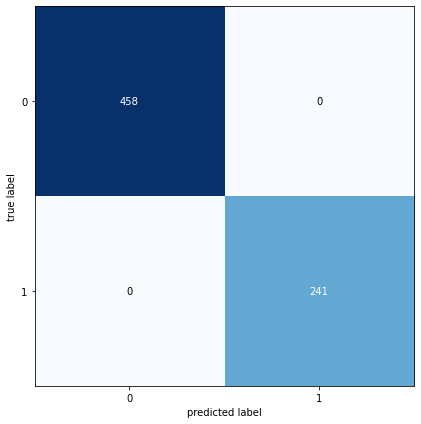

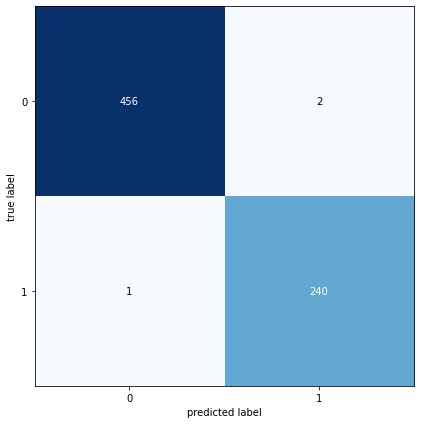

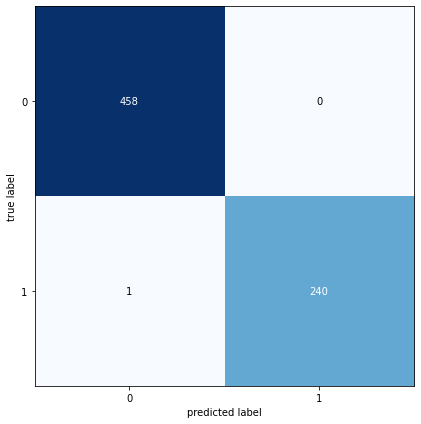

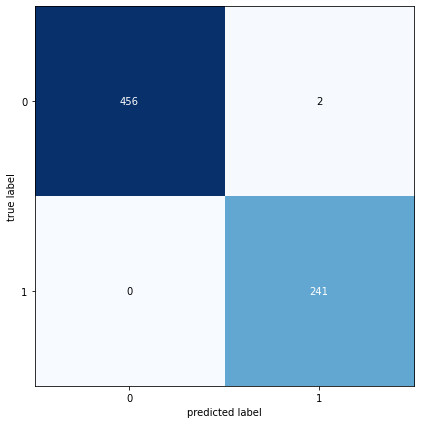

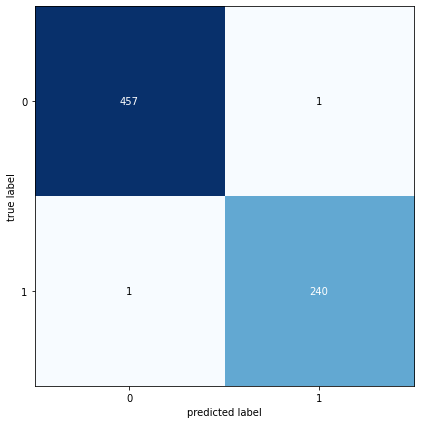

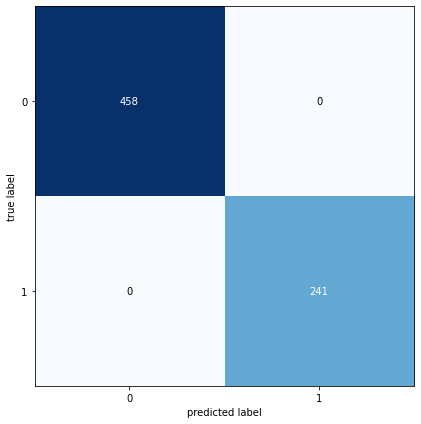

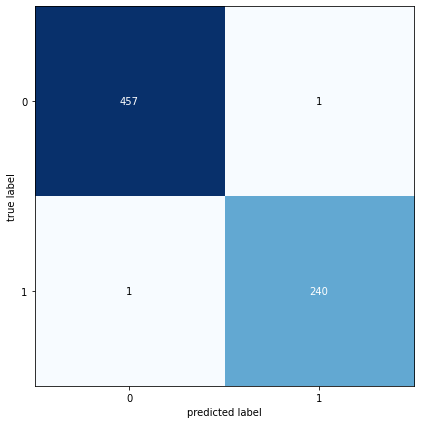

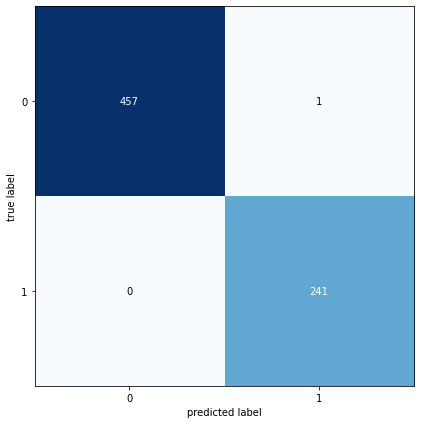

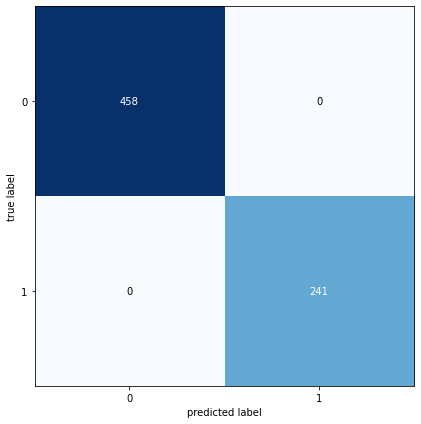

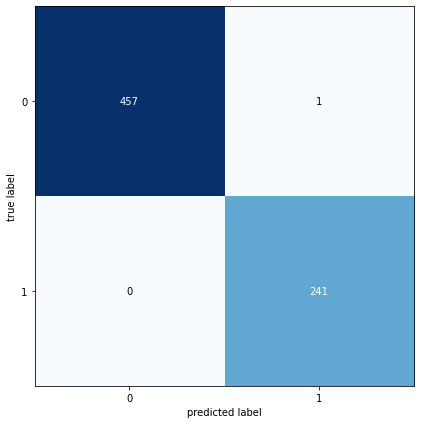

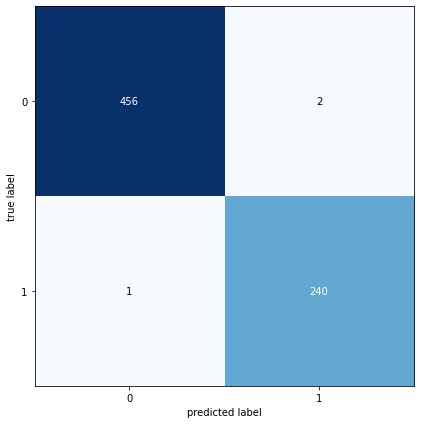

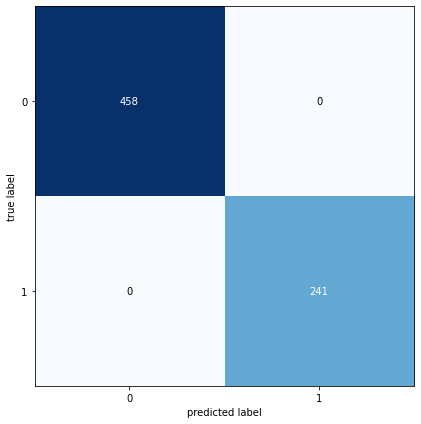

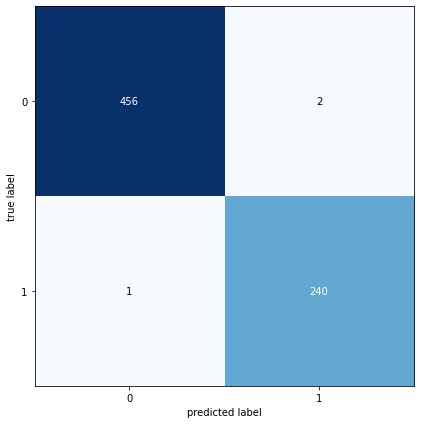

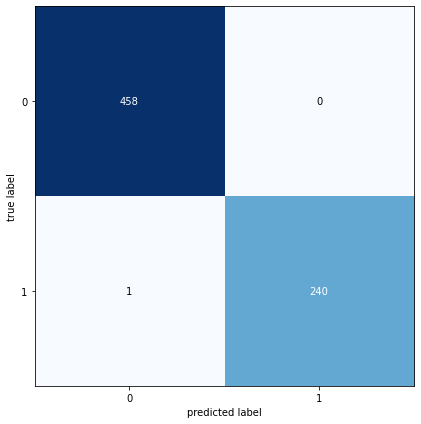

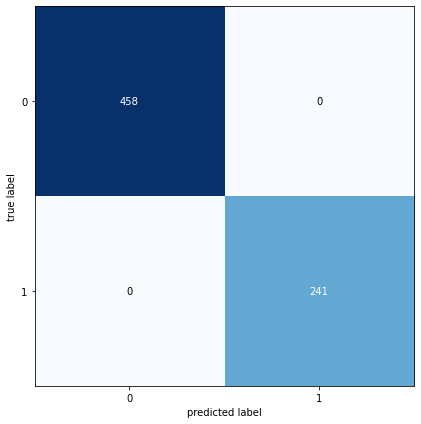

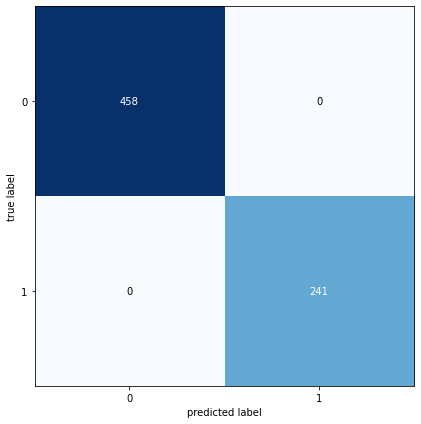

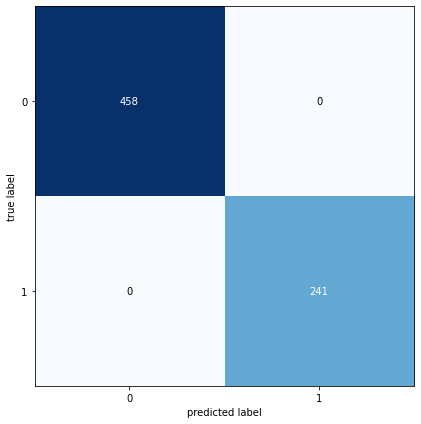

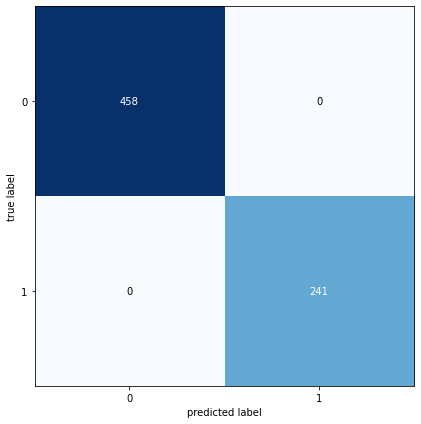

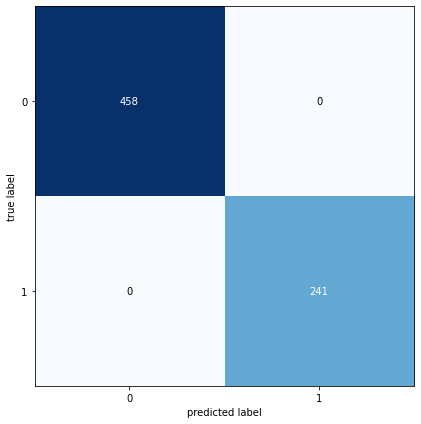

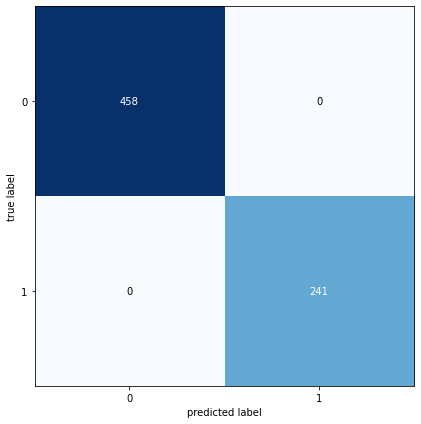

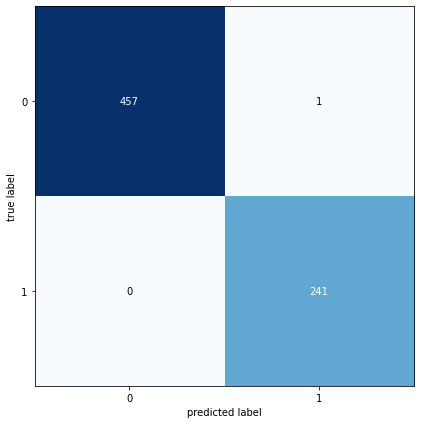

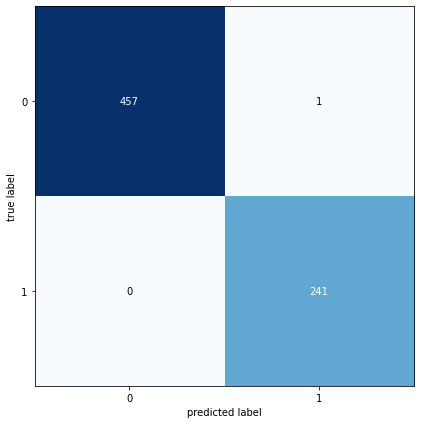

In [17]:
print(" METRICAS DEL BOSQUE ALEATORIO")
for i in range (30):
# Creamos el modelo de Bosques Aleatorios (y configuramos el número de estimadores (arboles de decision))
 BA_model = RandomForestClassifier(n_estimators=30,
                                  criterion="gini",
                                  max_features="sqrt",
                                  bootstrap=True,
                                  max_samples=4/5,
                                  oob_score=True)
 # Nos axulia a imprimir los datos sin tantas advertencias de los paquetes de SkLearn
 def warn(*args, **kwargs):
    pass
 import warnings
 warnings.warn = warn

#Establecemos los datos a ser usados en el modelo
 BA_model.fit(df[df.columns[:-1].values], df["10"].values)

#Declaracion para Obtener las Metricas
#Calculamos accuracy score y el OOB score del modelo 
 print("Caso: ",i)
 print("La Varianza es igual a: ", BA_model.score(df[df.columns[:-1].values], df["10"].values)) #Imprimiendo el Promedio de la Varianza
 print("El OOB Score es: ", BA_model.oob_score_)

#Calculamos precision score
 from sklearn.metrics import precision_score
 y_true = df["10"].values
 y_pred = BA_model.predict(df[df.columns[:-1].values])
 precision = precision_score(y_true, y_pred, average='macro')
 print("La Precision del Modelo es igual a:", precision)

 #Calculamos recall score
 from sklearn.metrics import recall_score
 y_true = df["10"].values
 y_pred = BA_model.predict(df[df.columns[:-1].values])
 sensibilidad = recall_score(y_true, y_pred, average='macro')
 print("La Sensibilidad del Modelo es igual a:", sensibilidad)

 #Calculamos f1 score
 from sklearn.metrics import f1_score
 y_true = df["10"].values
 y_pred = BA_model.predict(df[df.columns[:-1].values])
 puntaje = f1_score(y_true, y_pred, average='macro')
 print("El Puntaje del Modelo es igual a:", puntaje)

 #Graficamos la Matriz de Confusion
 from mlxtend.plotting import plot_confusion_matrix
 from sklearn.metrics import confusion_matrix
 y_pred = BA_model.predict(df[df.columns[:-1].values])
 matriz = confusion_matrix( df["10"].values,y_pred)

 plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
 print("\n")
 print("\n")
 plt.tight_layout()

MAPA DEL BOSQUE ALEATORIO


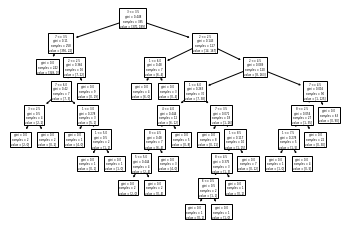

In [18]:
#Graficamos el Bosque Aleatorio en su totalidad
print("MAPA DEL BOSQUE ALEATORIO")
from sklearn import tree
for arbol in BA_model.estimators_:
  tree.plot_tree(arbol, feature_names=df.columns[:-1])
plt.show()